In [1]:
def flesch(df):
  
    
    # Flesch 
    df["Flesch"] = 206.835 - 1.015 * df["Avg_words_per_sentence"] - 84.6 * df["Avg_syllables_per_word"]
    
    return df


# DALE-CHALL


def dale_chall(df):
   


    # Dale-Chall 
    df["Dale_Chall"] = 0.1579 * (df["Difficult_word_percent"] * 100) + 0.0496 * df["Avg_words_per_sentence"]
    
    
    df.loc[df["Difficult_word_percent"] > 0.05, "Dale_Chall"] += 3.6365
        
    return df


# GUNNING FOG


def gunning_fog(df):
    

    df["Gunning_fog"] = 0.4 * (df["Avg_words_per_sentence"] + 100 * df["Complex_word_percent"])
    
    return df

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


In [3]:
df = pd.read_csv("weebit_train_with_features.csv", index_col=0)


In [4]:
df = flesch(df)
print(spearmanr(df['Level'], df['Flesch']))


SpearmanrResult(correlation=-0.35516664592636493, pvalue=2.775481201635248e-87)


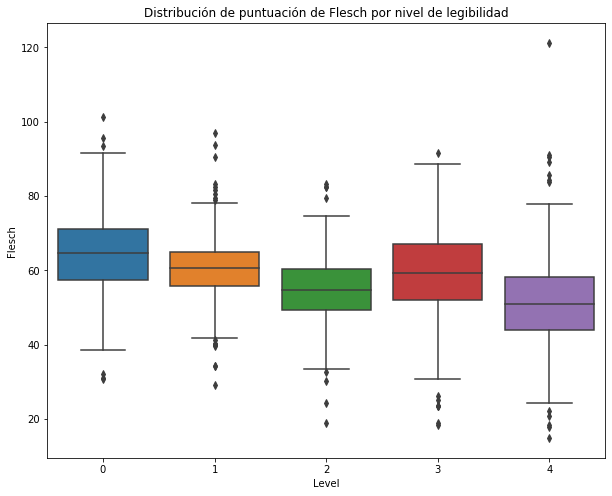

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Flesch", data=df)
plt.title("Distribución de puntuación de Flesch por nivel de legibilidad")
plt.show()


In [6]:
df = dale_chall(df)

In [7]:
print(spearmanr(df['Level'], df['Dale_Chall']))


SpearmanrResult(correlation=0.39303951392440434, pvalue=3.7707523781915455e-108)


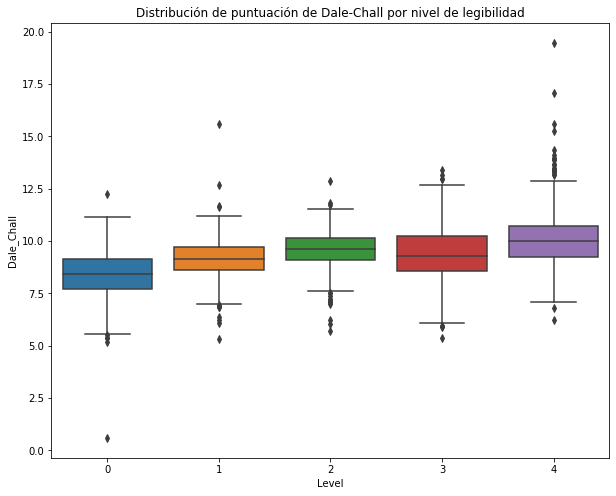

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Dale_Chall", data=df)
plt.title("Distribución de puntuación de Dale-Chall por nivel de legibilidad")
plt.show()

In [9]:
df = gunning_fog(df)
print(spearmanr(df['Level'], df['Gunning_fog']))


SpearmanrResult(correlation=0.3756470492050665, pvalue=3.206193290855814e-98)


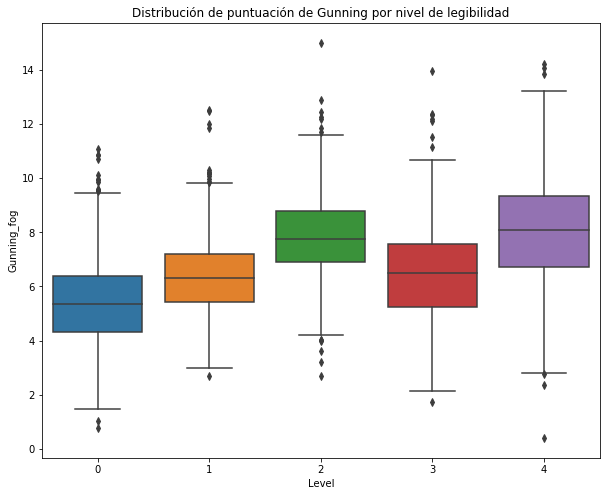

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Gunning_fog", data=df)
plt.title("Distribución de puntuación de Gunning por nivel de legibilidad")
plt.show()
